## Numerical algorithms 1, assignment 1

### 1 Multiple choice

    A - errors, correct answer: 1
    B – Data-fitting, correct answer: 2
    C – Bisection method, correct answer: 2
    D – Convergence, correct answer: 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

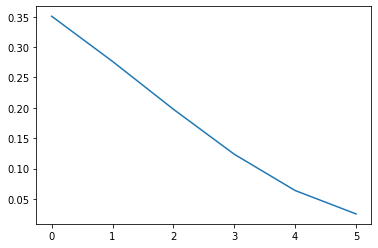

In [2]:
# For task D in multiple choice

x = np.arange(6)
err = np.array([1.23e-1, 7.64e-2, 3.91e-2, 1.53e-2, 4.10e-3, 6.53e-4])
plt.plot(x,np.sqrt(err))
plt.show()

### 2 Data fitting
#### 2.1

In [3]:
# Initialize arrays with data
x = np.array([0.0, 0.5, 1.0, 1.5, 2.0])
y = np.array([2.24, 0.80, 0.38, 0.09, 0.06])

# Linearize
x1 = np.exp(-x)
x2 = np.exp(-2*x)

# Find the coefficient matrix
A = np.array([x1,x2]).T

print("System matrix")
print(A,"\n")
print("Right hand side")
print(np.dot(A.T,y))

System matrix
[[1.         1.        ]
 [0.60653066 0.36787944]
 [0.36787944 0.13533528]
 [0.22313016 0.04978707]
 [0.13533528 0.01831564]] 

Right hand side
[2.89322055 2.59131074]


#### 2.2

In [4]:
a,b = np.linalg.solve(A.T@A,np.dot(A.T,y))

def f(a,b,x):
    return a*np.exp(-x) + b*np.exp(-2*x)
    
print("Coefficients: a and b")
print(f"a: {a:#.4}, b: {b:#.4}\n")

Coefficients: a and b
a: 0.07511, b: 2.157



#### 2.3

In [5]:
print("Absolute error")
print([float(f"{abs(y[i]-f(a,b,x_point)):#.2}") for i,x_point in enumerate(x)])

Absolute error
[0.0077, 0.039, 0.06, 0.034, 0.01]


### 3 Convergence of Newton’s method for double root
#### Question 1

In [6]:
def newton(starting_point, nmax, f, f_div):
    x = starting_point
    xs = [x]
    for _ in range(nmax):
        fx = f(x)
        fp = f_div(x)
        x = x - (fx / fp)
        xs.append(x)
    return xs

f = lambda x: (x-2)**2 * (x-8)
f_div = lambda x: (x-8)*(2*x-4) + (x-2)**2

x_hat = newton(4.6, 12, f, f_div)
error = [abs(2-x_point) for x_point in x_hat]
quad_error = [abs(error[i]/(error[i-1]**2)) for i in range(1, len(error))]

In [7]:
import pandas as pd
quad_error.insert(0, "-")
pd.DataFrame({"x_n": x_hat, "|e_n|": error, "|en/e(n-1)**2|": quad_error})

,x_n,|e_n|,|en/e(n-1)**2|
0,4.600000,2.600000,-
1,2.495238,0.495238,0.0732601
2,2.235956,0.235956,0.962061
3,2.115513,0.115513,2.07476
4,2.057184,0.057184,4.28562
5,2.028454,0.028454,8.70146
6,2.014193,0.014193,17.5304
7,2.007088,0.007088,35.1871
8,2.003542,0.003542,70.4999
9,2.001770,0.001770,141.125


#### Question 2
First we define equation (4) from the assignment.
\begin{equation*}
    e_{n+1} = x_{n+1} - r = e_n - 2 \frac{f(x_n)}{f'(x_n)}
\end{equation*}

Next we define the taylor series polynomiums.
\begin{align*}
    f(x_n) &= f(r) + f'(r)e_n + \frac{1}{2} f''(r)e_n^2 + \frac{1}{6} + f'''(\xi_n)e_n^3 \\
    f'(x_n) &= f'(r)e_n + f''(r)e_n + \frac{1}{2} + f'''(\zeta)e_n^2
\end{align*}

We'll reduce the above expressions using that $f(r)$ is a double root, and substitute them in to equation (4) from the assignment.
\begin{equation*}
    e_{n+1} = x_{n+1} - r = e_n - 2 \frac{\frac{1}{2} f''(r)e_n^2 + \frac{1}{6} + f'''(\xi_n)e_n^3}{f''(r)e_n + \frac{1}{2} + f'''(\zeta)e_n^2} = e_n -  \frac{f''(r)e_n^2 + \frac{1}{3} + f'''(\xi_n)e_n^3}{f''(r)e_n + \frac{1}{2} + f'''(\zeta)e_n^2}
\end{equation*}

Then we find a common denominator for $e_n$ and the fraction.
\begin{equation*}
    e_{n+1} = \left(\frac{f''(r)+\frac{1}{2}f'''(\zeta_n)e_n - f''(r)+\frac{1}{3}f'''(\xi_n)e_n}{f''(r)e_n+\frac{1}{2}f'''(\zeta)e_n^2}\right)e_n^2 = \left(\frac{\frac{1}{2}f'''(\zeta_n)e_n-\frac{1}{3}f'''(\xi_n)e_n}{f''(r)e_n+\frac{1}{2}f'''(\zeta)e_n^2}\right)e_n^2
\end{equation*}

Which can be further reduced to:
\begin{equation*}
    e_{n+1} = \left(\frac{\frac{1}{2}f'''(\zeta_n)-\frac{1}{3}f'''(\xi_n)}{f''(r)+\frac{1}{2}f'''(\zeta)e_n}\right)e_n^2 = \left(\frac{3f'''(\zeta_n)-2f'''(\xi_n)}{6f''(r)+3f'''(\zeta)e_n}\right)e_n^2
\end{equation*}

#### Question 3
Now we impliment expression (3) from the assignment in to the newton function.

In [8]:
def newton(starting_point, nmax, f, f_div, m=2):
    x = starting_point
    xs = [x]
    for _ in range(nmax):
        fx = f(x)
        fp = f_div(x)
        x = x - m*(fx / fp)
        xs.append(x)
    return xs

f = lambda x: (x-2)**2 * (x-8)
f_div = lambda x: (x-8)*(2*x-4) + (x-2)**2

x_hat = newton(4.6, 5, f, f_div)
error = [abs(2-x_point) for x_point in x_hat]
quad_error = [abs(error[i]/(error[i-1]**2)) for i in range(1, len(error))]

In [9]:
quad_error.insert(0, "-")
pd.DataFrame({"x_n": x_hat, "|e_n|": error, "|en/e(n-1)**2|": quad_error})

,x_n,|e_n|,|en/e(n-1)**2|
0,4.600000,2.600000e+00,-
1,0.390476,1.609524e+00,0.238095
2,1.846061,1.539386e-01,0.0594228
3,1.998098,1.901576e-03,0.0802451
4,2.000000,3.011896e-07,0.0832937
5,2.000000,7.549517e-15,0.0832222


As you can see on the above table the convergence ratio converges on a constant $c = 0.083$. Hence the function must converge quadratically.

#### Question 4



We start by double and triple differentiating the function (2) from the assignment.

In [10]:
ddf = lambda x: 6*(x-4)
dddf = lambda c=0: 6

As we can see, the tripple derivative is a constant $c=6$. This makes it possible for us to completely determine our convergence ratio.
Furthermore we know, that the error converges on zero, as n goes towards infinity.

In [11]:
con_rat = lambda x: ((3*dddf()-2*dddf())/(6*ddf(x)))
con_rat(2)

-0.08333333333333333

The convergence ratio converges to $\frac{1}{12}$, which is relatively close to the value found in question 3.